# Notebook for creating Models for Randall's data

### Import Libraries and read data

In [1]:
import sys

# Set path to root directory
sys.path.append(r'/home/rlfowler/Documents/research/tfo_inverse_modelling')

# Import necessary modules
import os
import pandas as pd
import numpy as np

# Set my GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [2]:
DATA_PATH = r'/home/rlfowler/Documents/research/tfo_inverse_modelling/Randalls Folder/data/randall_data_intensities.pkl'
#CONFIG_PATH = r'/home/rlfowler/Documents/research/tfo_sim/data/compiled_intensity/randall_data.json'

# Load the data
data = pd.read_pickle(DATA_PATH)
print(data.shape)
data.head()

(35929014, 47)


,Maternal Wall Thickness,Fetal Radius,Fetal Displacement,Maternal Hb Concentration,Maternal Saturation,Fetal Hb Concentration,Fetal Saturation,10.0_1.0,15.0_1.0,19.0_1.0,...,55.0_2.0,59.0_2.0,64.0_2.0,68.0_2.0,72.0_2.0,77.0_2.0,81.0_2.0,86.0_2.0,90.0_2.0,94.0_2.0
43923,2.0,50.0,5.0,11.0,0.9,10.725,0.10,0.000041,0.000005,0.000001,...,6.001589e-15,5.848743e-15,2.763929e-16,1.500358e-17,3.398607e-18,1.015295e-18,7.130597e-20,8.710054e-22,4.012456e-20,2.355748e-22
43924,2.0,50.0,5.0,11.0,0.9,10.725,0.15,0.000041,0.000005,0.000001,...,5.893694e-15,5.768395e-15,2.710312e-16,1.463642e-17,3.212955e-18,9.575111e-19,6.831444e-20,8.155644e-22,3.835888e-20,2.151092e-22
43925,2.0,50.0,5.0,11.0,0.9,10.725,0.20,0.000041,0.000005,0.000001,...,5.789363e-15,5.689761e-15,2.658178e-16,1.428727e-17,3.039417e-18,9.030257e-19,6.545149e-20,7.646231e-22,3.667090e-20,1.964215e-22
43926,2.0,50.0,5.0,11.0,0.9,10.725,0.25,0.000041,0.000005,0.000001,...,5.688417e-15,5.612798e-15,2.607455e-16,1.395518e-17,2.877101e-18,8.516513e-19,6.271132e-20,7.177746e-22,3.505719e-20,1.793575e-22
43927,2.0,50.0,5.0,11.0,0.9,10.725,0.30,0.000041,0.000005,0.000001,...,5.590720e-15,5.537444e-15,2.558081e-16,1.363931e-17,2.725183e-18,8.032090e-19,6.008842e-20,6.746510e-22,3.351450e-20,1.637759e-22


In [3]:
for col in data.columns[:7]:
    print(f"{col}: {data[col].unique()}")

Maternal Wall Thickness: [ 2.  3.  4.  5.  6.  7.  8.  9. 10.]
Fetal Radius: [ 50.  70.  90. 110. 130. 150. 170. 190. 210. 230. 250. 270. 290. 310.
 330. 350. 370. 390. 410. 430. 450. 470. 490.]
Fetal Displacement: [ 5. 15. 20. 25. 40. 10. 35.  0. 30.]
Maternal Hb Concentration: [11.  11.5 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16. ]
Maternal Saturation: [0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]
Fetal Hb Concentration: [10.725  11.     11.2125 11.275  11.5    11.7    11.7875 12.     12.1875
 12.3    12.5    12.675  12.8125 13.     13.1625 13.325  13.5    13.65
 13.8375 14.     14.1375 14.35   14.5    14.625  14.8625 15.     15.1125
 15.375  15.5    15.6    15.8875 16.     16.4   ]
Fetal Saturation: [0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6 ]


In [4]:
y_columns = data.columns[:7]#["Fetal Saturation"]
x_columns = data.columns[7:]
print(f"y_columns: {y_columns.tolist()}")
print(f"x_columns: {x_columns.tolist()}")

y_columns: ['Maternal Wall Thickness', 'Fetal Radius', 'Fetal Displacement', 'Maternal Hb Concentration', 'Maternal Saturation', 'Fetal Hb Concentration', 'Fetal Saturation']
x_columns: ['10.0_1.0', '15.0_1.0', '19.0_1.0', '24.0_1.0', '28.0_1.0', '33.0_1.0', '37.0_1.0', '41.0_1.0', '46.0_1.0', '50.0_1.0', '55.0_1.0', '59.0_1.0', '64.0_1.0', '68.0_1.0', '72.0_1.0', '77.0_1.0', '81.0_1.0', '86.0_1.0', '90.0_1.0', '94.0_1.0', '10.0_2.0', '15.0_2.0', '19.0_2.0', '24.0_2.0', '28.0_2.0', '33.0_2.0', '37.0_2.0', '41.0_2.0', '46.0_2.0', '50.0_2.0', '55.0_2.0', '59.0_2.0', '64.0_2.0', '68.0_2.0', '72.0_2.0', '77.0_2.0', '81.0_2.0', '86.0_2.0', '90.0_2.0', '94.0_2.0']


In [5]:
from sklearn import preprocessing

## Scale y, sets mean to 0 and variance to 1
y_scaler = preprocessing.StandardScaler()
data[y_columns] = y_scaler.fit_transform(data[y_columns])

## Scale x
x_scaler = preprocessing.StandardScaler()
data[x_columns] = x_scaler.fit_transform(data[x_columns])

## Modeling

In [6]:
IN_FEATURES = len(x_columns)
OUT_FEATURES = len(y_columns)
print("In Features :", IN_FEATURES)  
print("Out Features:", OUT_FEATURES)

In Features : 40
Out Features: 7


Select small subset of data.
* Random Selection
* Filtered Selections

In [7]:
from sklearn.model_selection import train_test_split

SUBSET_TYPE = "random"
RANDOM_SEED = 42    # Set the random seed for reproducibility
SAMPLE_SIZE = 0.05   # Set the sample size from the data
TEST_SIZE = 0.2     # Set the test size for the train/test split

if 'data' in globals():
    # Split the data into training and testing sets # Might want to remove randomness for param selection
    if SUBSET_TYPE == "random":
        dataset = data.sample(frac=SAMPLE_SIZE, random_state=RANDOM_SEED)
    elif SUBSET_TYPE == "all":
        dataset = data
    else:
        raise ValueError("Invalid subset type. Must be either 'random' or 'all'.")
    del data
    print(dataset.shape)
else:
    if 'dataset' not in globals():
        print("Data not loaded. Please load data.")
    else:
        print("Data already loaded. Proceeding with current dataset.")
        print(dataset.shape) # type: ignore

(1796451, 47)


In [8]:
from inverse_modelling_tfo.model_training.DataLoaderGenerators import DataLoaderGenerator
from inverse_modelling_tfo.model_training.validation_methods import RandomSplit

data_loader_params = {
    'shuffle': True,    # The dataloader will shuffle its outputs at each epoch
    'num_workers': 0,   # The number of workers that the dataloader will use to generate the batches
}
validation_method = RandomSplit(0.8)
dataloader_gen = DataLoaderGenerator(dataset, x_columns, y_columns, 2, data_loader_params)
train_loader, validation_loader = dataloader_gen.generate(validation_method)

In [9]:
from inverse_modelling_tfo.model_training import TorchLossWrapper
import torch.nn as nn   # PyTorch's neural network module

criterion = TorchLossWrapper(nn.MSELoss(), name="mse")   # good old MSE loss

In [10]:
from inverse_modelling_tfo.model_training.custom_models import PerceptronBD

model = PerceptronBD([len(x_columns), 20, 10, 10, len(y_columns)], dropout_rates=[0.4, 0.4, 0.4, 0.4]) 

In [11]:
# We can visualize this model by using torchinfo
import torchinfo
torchinfo.summary(model)

Layer (type:depth-idx)                   Param #
PerceptronBD                             --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       820
│    └─BatchNorm1d: 2-2                  40
│    └─Dropout1d: 2-3                    --
│    └─ReLU: 2-4                         --
│    └─Linear: 2-5                       210
│    └─BatchNorm1d: 2-6                  20
│    └─Dropout1d: 2-7                    --
│    └─ReLU: 2-8                         --
│    └─Linear: 2-9                       110
│    └─BatchNorm1d: 2-10                 20
│    └─Dropout1d: 2-11                   --
│    └─ReLU: 2-12                        --
│    └─Linear: 2-13                      77
│    └─Flatten: 2-14                     --
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0

20 minutes for 1 epoch

In [12]:
from inverse_modelling_tfo.model_training import ModelTrainer 

trainer = ModelTrainer(model, dataloader_gen, validation_method, criterion)
trainer.run(10)

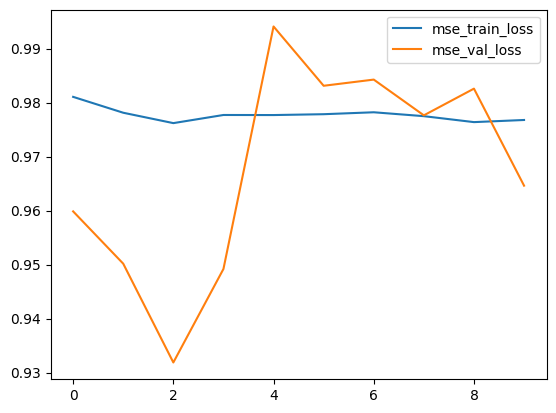

In [13]:
import matplotlib.pyplot as plt

loss_plot = plt.figure()
criterion.loss_tracker.plot_losses()    # Plot the losses

In [14]:
print(trainer)


        Model Properties:
        PerceptronBD(
  (model): Sequential(
    (0): Linear(in_features=40, out_features=20, bias=True)
    (1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout1d(p=0.4, inplace=False)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=10, bias=True)
    (5): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout1d(p=0.4, inplace=False)
    (7): ReLU()
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Dropout1d(p=0.4, inplace=False)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=7, bias=True)
    (13): Flatten(start_dim=1, end_dim=-1)
  )
)
        Optimizer Properties"
        SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.0003
    maximize: False
    momentum: 0.9
    nesterov: False
   

About 2 minutes

In [15]:
# Increase batch_size for faster visuals generation - (does not affect training!)
from inverse_modelling_tfo.visualization.distributions import generate_model_error_and_prediction

trainer.change_batch_size(4096)
train_error, train_pred = generate_model_error_and_prediction(trainer.model, trainer.train_loader, y_columns, y_scaler)
val_error, val_pred = generate_model_error_and_prediction(trainer.model, trainer.validation_loader, y_columns, y_scaler)

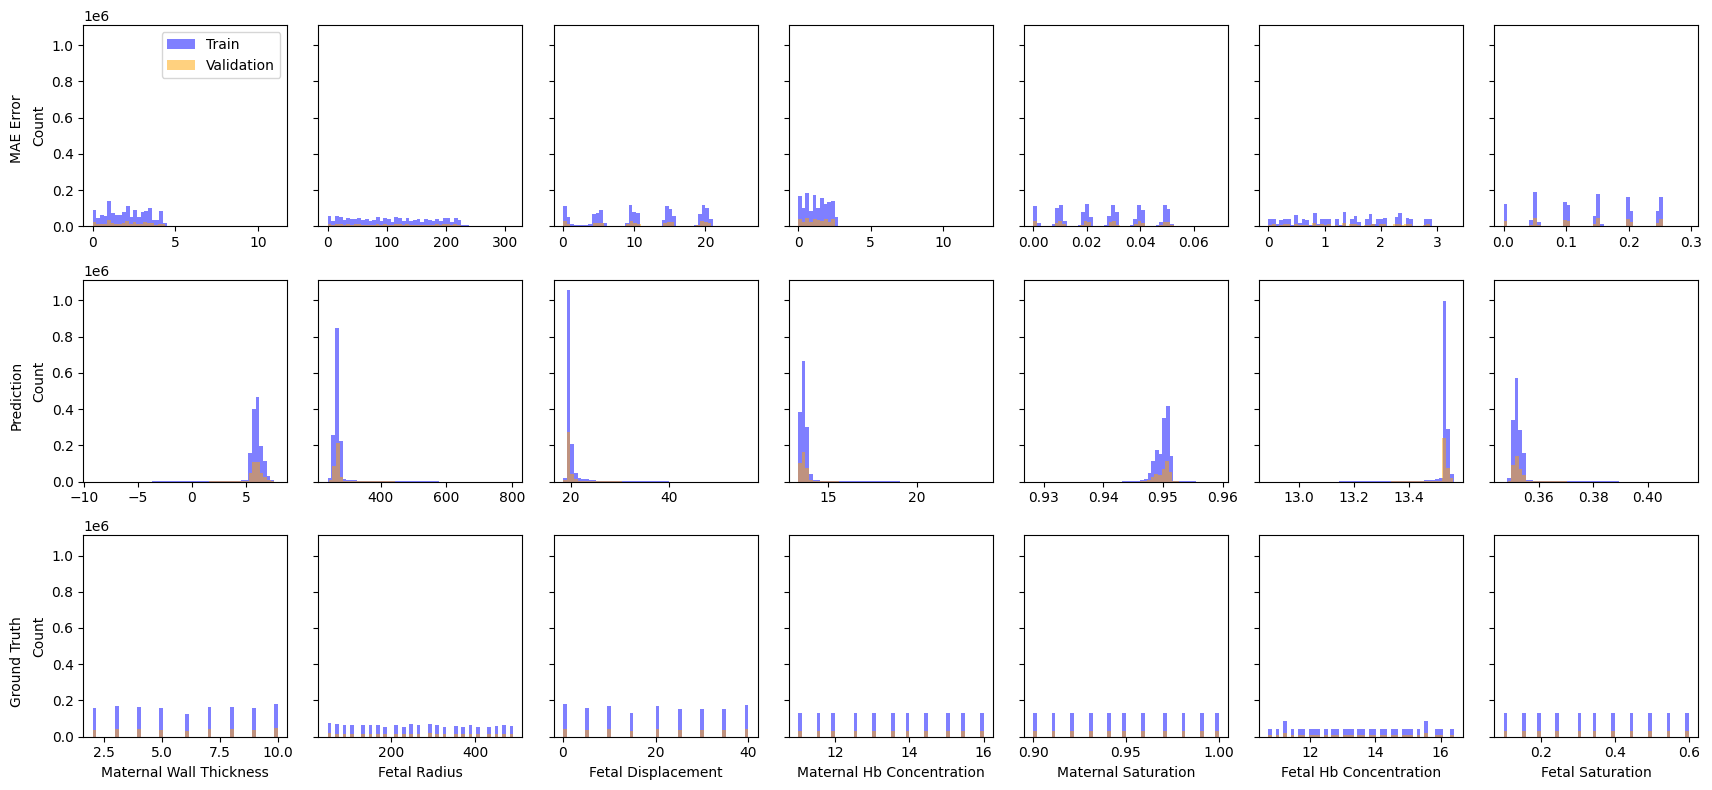

In [16]:
import matplotlib.pyplot as plt

BIN_COUNT = 50

fig_dist, axes = plt.subplots(3, len(y_columns), squeeze=True, figsize=(17, 8), sharey=True)
train_data = y_scaler.inverse_transform(trainer.train_loader.dataset[:][1].cpu())
val_data = y_scaler.inverse_transform(trainer.validation_loader.dataset[:][1].cpu())

for i in range(len(y_columns)):
    # Plot Errors
    ax = axes[0, i]
    plt.sca(ax)
    column_name = train_error.columns[i]
    plt.hist(train_error[column_name], bins=BIN_COUNT, color='blue', alpha=0.5, label='Train')
    plt.hist(val_error[column_name], bins=BIN_COUNT, color='orange', alpha=0.5, label='Validation')

    
    # Plot Predictions
    ax = axes[1, i]
    plt.sca(ax)
    column_name = train_pred.columns[i]
    plt.hist(train_pred[column_name], bins=BIN_COUNT, color='blue', alpha=0.5, label='Train')
    plt.hist(val_pred[column_name], bins=BIN_COUNT, color='orange', alpha=0.5, label='Validation')

    
    # Plot Ground Truth
    ax = axes[2, i]
    plt.sca(ax)
    plt.hist(train_data[:, i], bins=BIN_COUNT, color='blue', alpha=0.5, label='Train')
    plt.hist(val_data[:, i], bins=BIN_COUNT, color='orange', alpha=0.5, label='Validation')

    # X Label for the bottommost row
    plt.xlabel(y_columns[i])
    
# Add text to the left of each row of plots
for i, label in enumerate(['MAE Error', 'Prediction', 'Ground Truth']):
    fig_dist.text(0, (2.5-i)/3, label, ha='center', va='center', rotation='vertical')

# Y Labels
for i in range(axes.shape[0]):
    axes[i, 0].set_ylabel('Count')

# Add labels to top-left subplot
axes[0, 0].legend()


plt.tight_layout()
plt.show()

In [17]:
from mdreport import MarkdownReport
from pathlib import Path

report = MarkdownReport(Path('results'), 'report_epoch10_random_all', 'Example Report')
report.add_text_report("Objective", "Training Models using the ModelTrainer Class")
report.add_code_report("Model Used", str(torchinfo.summary(trainer.model)))
report.add_image_report("Loss Curves", loss_plot)
report.add_image_report("Error Distributions", fig_dist)
report.save_report()